### <Numpy 복습>
주식 데이터를 받아서 시가/고가/거래량의 평균을 구하세요.

다음 배열의 shape을 구하세요.<BR>
[1, 2, 3] [2, 3, 4]

In [2]:
import numpy as np

In [6]:
a = np.array([1, 2, 3, 4]) # 리스트를 배열로 변환
b = np.zeros(shape=(3, 4), dtype=np.int)
c = np.ones(shape=(3,4), dtype=np.float)
d = np.arange(1, 8, 2)
a, b, c, d

(array([1, 2, 3, 4]), array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]), array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), array([1, 3, 5, 7]))

In [7]:
# ..._like(배열) 해당 배열과 같은 크기의 배열 만든다.
np.zeros_like(d), np.ones_like(d), np.eye(3)

(array([0, 0, 0, 0]), array([1, 1, 1, 1]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

### < MatPlotLib >

In [15]:
import matplotlib.pyplot as plt

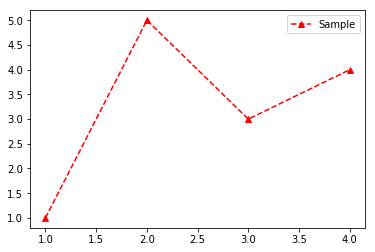

In [19]:
plt.plot([1, 2, 3, 4], [1, 5, 3, 4], 'r--^', label='Sample')
plt.legend()

#### 교재 UNIT 06 기온 데이터를 다양하게 시각화하기

(array([2., 1., 1., 1., 1., 2., 1., 1., 0., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

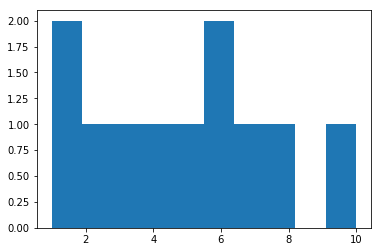

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist([1, 1, 2, 3, 4, 5, 6, 6, 7, 8, 10])

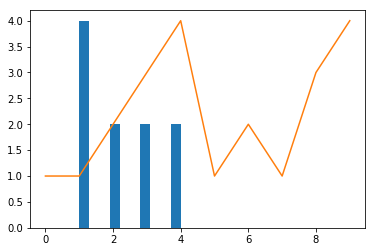

In [24]:
x = np.random.randint(1, 5, size=10)
plt.hist(x)
plt.plot(x)

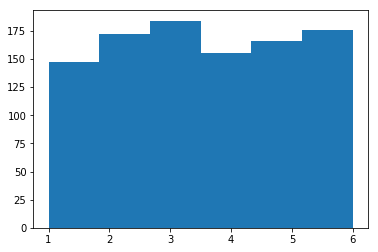

In [43]:
# 천번의 주사위 던지기 기록을 생성합니다.
dice = np.random.randint(1, 7, size=1000)
plt.hist(dice, bins=6) # bins 는 막대의 개수를 지정.
plt.show()

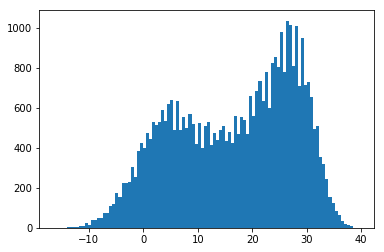

In [120]:
# 서울 기온에 대한 그래프 만들기
import csv

f = open('seoul.csv')
data = csv.reader(f)
next(data) # 헤더를 스킵한다.

rows = [] # data를 보관할 배열
result = [] # 결과를 담을 배열을 선언

for row in data:
    rows.append(row)
    if row[-1] != '': # 최고기온이 없는 행은 제외
        result.append(float(row[-1])) # 최고기온을 결과배열에 저장

plt.hist(result, bins=100) # bins를 설정 안하면 10개정도로 보여준다.
plt.show()

f.close()

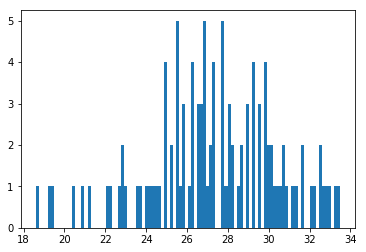

In [121]:
# 특정일자의 데이터만 그래프를 그리자
result = []
result_01 = []
result_08 = []

for row in rows:
    if row[-1] != '': # '-'를 기준으로 split 하면 [<년도>, <월>, <일>] 배열이 된다.
        if (row[0].split('-')[1] == '06') and (row[0].split('-')[2] == '19'):
            result.append(float(row[-1])) # 최고기온을 결과배열에 저장
        elif row[0].split('-')[1] == '01':
            result_01.append(float(row[-1]))
        elif row[0].split('-')[1] == '08':
            result_08.append(float(row[-1]))

plt.hist(result, bins=100) # bins를 설정 안하면 10개정도로 보여준다.
plt.show()

상자 그림(box plot) p86

5.888888888888889 4.0


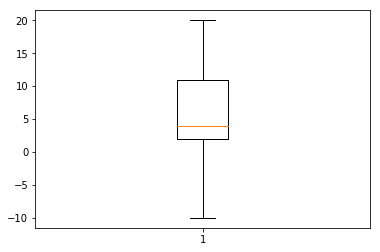

In [122]:
x = np.array([1, 2, 3, 4, 10, 11, 12, 20, -10])
print(x.mean(), np.median(x))

plt.boxplot(x) # 데이터를 정규분포로 표현했을 때 그 범위를 벗어나면 이상치다.
plt.show()

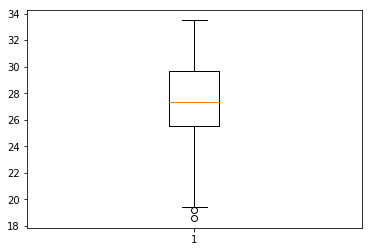

In [123]:
plt.boxplot(result)
plt.show()

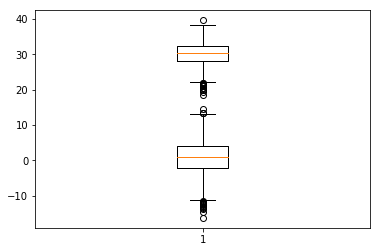

In [124]:
plt.boxplot(result_01)
plt.boxplot(result_08)
plt.show()

In [129]:
# 100년의 1 ~ 12월 최고기온을 그래프로 그리자
import pandas as pd

data = pd.read_csv('seoul.csv', encoding='cp949')
data = data.dropna()

In [139]:
month = []
for i in range(12):
    month.append([])

data = np.array(data)
for row in data:
    month[int(row[0].split('-')[1]) - 1].append(row[-1])

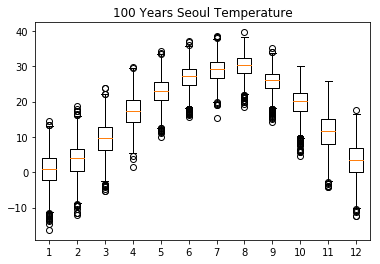

In [152]:
plt.title('100 Years Seoul Temperature')
plt.boxplot(month)
plt.show()